<p style="background-color:firebrick;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>EDA Project</b></p>

<b>Contains:</b>
<ul>
<li><a href="#import-library">Importing Libraries</a></li>
<li><a href="#loading-dataset">Loading The Dataset</a></li>
<li><a href="#understanding-dataset">Understanding The Dataset</a></li>
<li><a href="#organizing-columns">Organizing Columns</a></li>
<li><a href="#nan-values">NaN Values</a></li>
<li><a href="#data-visualization">Data Visualization</a></li>
<li><a href="#save-data">Save  to Dataset</a></li>
</ul>

<a id='import-library'></a>
# <font color='firebrick'> <b>Importing Libraries</b><font color='black'> 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
import plotly.express as px

from skimpy import skim

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<a id='loading-dataset'></a>
# <font color='firebrick'> <b>Loading The Dataset</b><font color='black'> 

In [2]:
df0 = pd.read_csv("realistic_e_commerce_sales_data.csv")
df = df0.copy()

In [3]:
df.sample(5)

,Customer ID,Gender,Region,Age,Product Name,Category,Unit Price,Quantity,Total Price,Shipping Fee,Shipping Status,Order Date
642,CUST0142,Male,North,32.0,Laptop,Electronics,1500.0,1,1500,8.53,In Transit,2023-08-11
389,CUST0063,Male,North,20.0,Monitor,Electronics,300.0,4,1200,15.57,Delivered,2023-11-06
200,CUST0109,Female,NaN,57.0,Mouse,Accessories,30.0,1,30,9.59,In Transit,2023-03-12
632,CUST0219,Female,South,48.0,Keyboard,Accessories,50.0,5,250,14.34,Delivered,2023-09-28
965,CUST0071,Male,East,46.0,Monitor,Electronics,300.0,1,300,6.17,In Transit,2023-12-10


<a id='understanding-dataset'></a>
# <font color='firebrick'> <b>Understanding The Dataset</b><font color='black'> 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer ID      1000 non-null   object 
 1   Gender           1000 non-null   object 
 2   Region           950 non-null    object 
 3   Age              900 non-null    float64
 4   Product Name     1000 non-null   object 
 5   Category         1000 non-null   object 
 6   Unit Price       1000 non-null   float64
 7   Quantity         1000 non-null   int64  
 8   Total Price      1000 non-null   int64  
 9   Shipping Fee     1000 non-null   float64
 10  Shipping Status  950 non-null    object 
 11  Order Date       1000 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 93.9+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,900.0,46.695556,15.011400,18.0,35.00,49.000,59.000,69.000000
Unit Price,1000.0,457.703777,537.231434,30.0,50.00,200.000,800.000,3109.560612
Quantity,1000.0,3.008000,1.404246,1.0,2.00,3.000,4.000,5.000000
Total Price,1000.0,1346.600000,1834.037877,30.0,200.00,600.000,1500.000,7500.000000
Shipping Fee,1000.0,12.416390,4.412185,5.0,8.56,12.315,16.075,19.980000


In [6]:
df.describe(include = 'object').T

,count,unique,top,freq
Customer ID,1000,292,CUST0204,9
Gender,1000,2,Male,524
Region,950,4,West,246
Product Name,1000,7,Monitor,181
Category,1000,3,Electronics,477
Shipping Status,950,3,In Transit,329
Order Date,1000,340,2024-01-03,20


In [7]:
df.isnull().sum()

Customer ID          0
Gender               0
Region              50
Age                100
Product Name         0
Category             0
Unit Price           0
Quantity             0
Total Price          0
Shipping Fee         0
Shipping Status     50
Order Date           0
dtype: int64

In [8]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1000   │ │ string      │ 7     │                                                          │
│ │ Number of columns │ 12     │ │ float64     │ 3     │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name      ┃ NA    ┃ NA %   ┃ mean    ┃ sd      ┃ p0  ┃ p25    ┃ p50     ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ Age              │   100 │     10 │    46.7 │   15.01 │  18 │     35 │      49 │     59 │     69 │ ▅▅▆▅▇▇  │  │
│ │ Unit Price       │     0 │      0 │   457.7 │   537.2 │  30 │     50 │     200 │    800 │   3110 │   ▇▂▂   │  │
│ │ Quantity         │     0 │      0 │   3.008 │   1.404 │   1 │      2 │       3 │      4 │      5 │ ▇▇ ▇▇▇  │  │
│ │ Total Price      │     0 │      0 │    1347 │    1834 │  30 │    200 │     600 │   1500 │   7500 │  ▇▁▁▁   │  │
│ │ Shipping Fee     │     0 │      0 │   12.42 │   4.412 │   5 │   8.56 │   12.32 │  16.07 │  19.98 │ ▇▇▇▇▆▇  │  │
│ └──────────────────┴───────┴────────┴─────────┴─────────┴─────┴────────┴─────────┴────────┴────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                     ┃ NA     ┃ NA %       ┃ words per row              ┃ total words           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Customer ID                     │      0 │          0 │                          1 │                  1000 │  │
│ │ Gender                          │      0 │          0 │                          1 │                  1000 │  │
│ │ Region                          │     50 │          5 │                       0.95 │                   950 │  │
│ │ Product Name                    │      0 │          0 │                          1 │                  1000 │  │
│ │ Category                        │      0 │          0 │                          1 │                  1000 │  │
│ │ Shipping Status                 │     50 │          5 │                        1.3 │                  1279 │  │
│ │ Order Date                      │      0 │          0 │                          1 │                  1000 │  │
│ └─────────────────────────────────┴────────┴────────────┴────────────────────────────┴───────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

<Axes: >

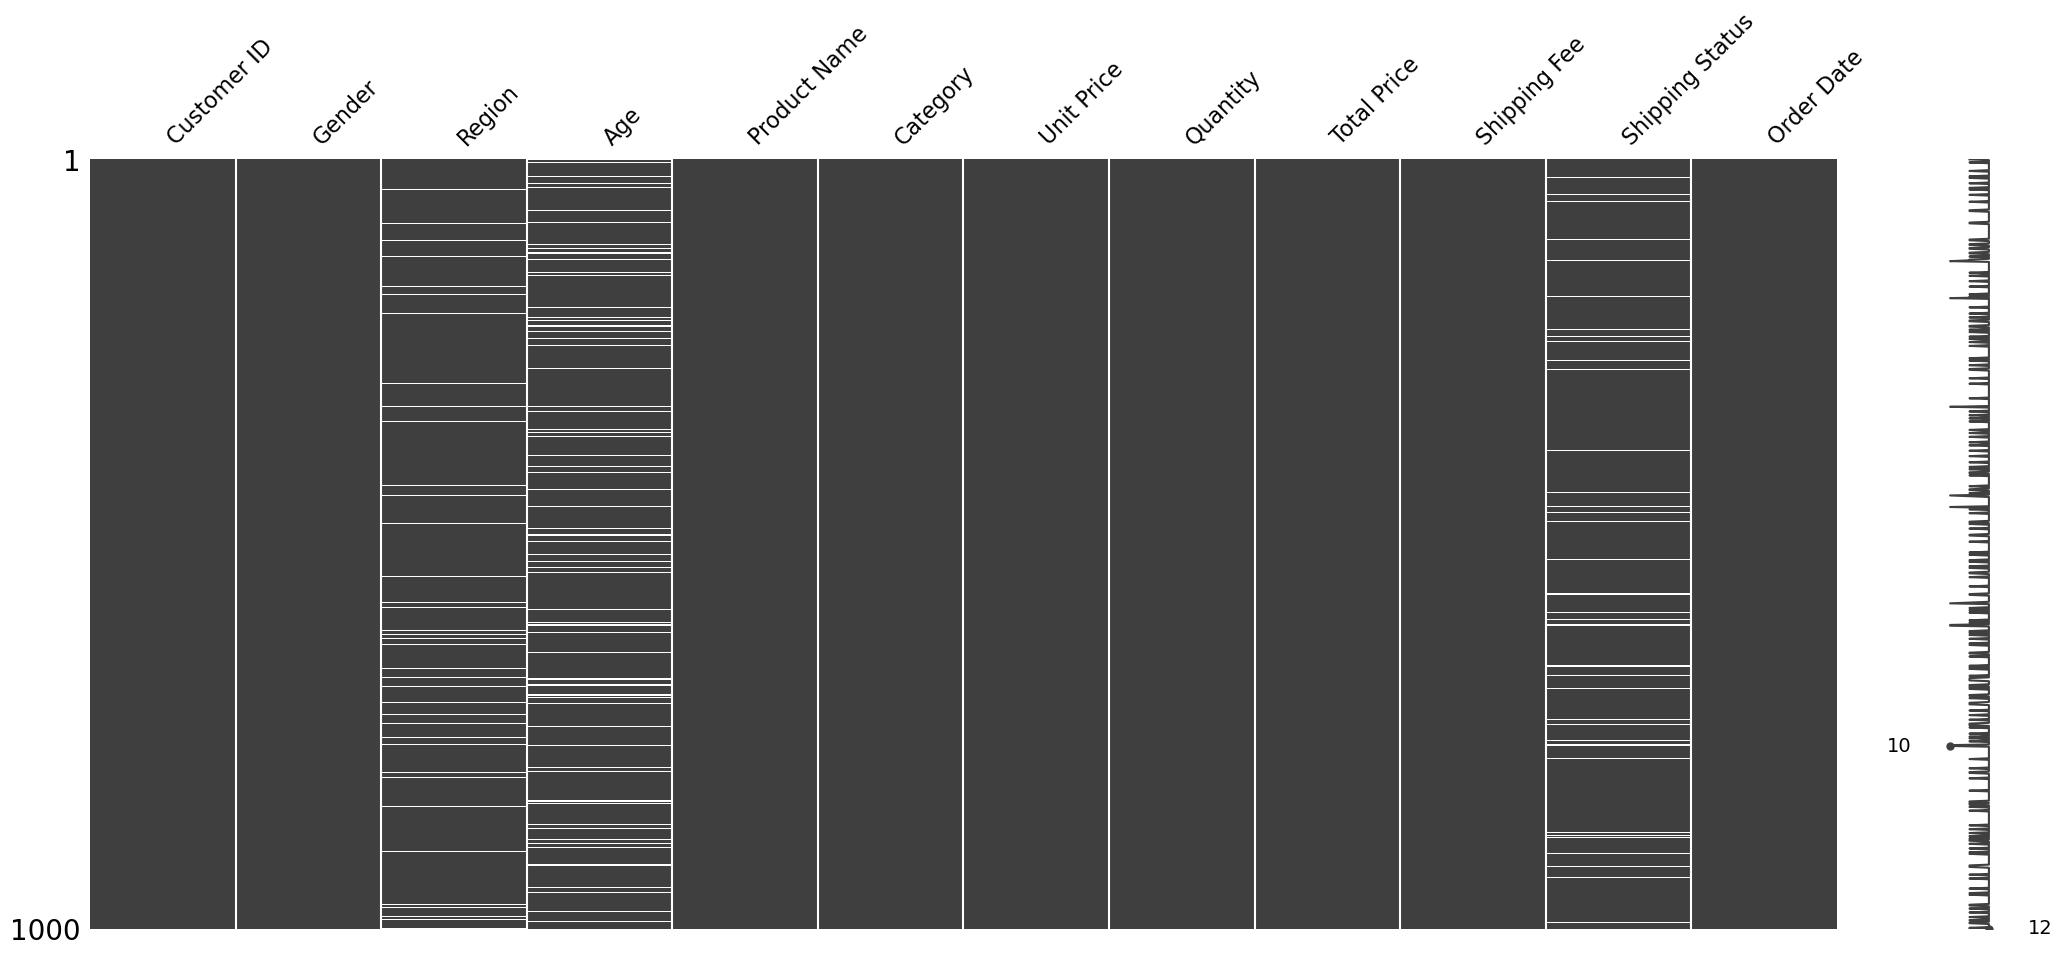

In [9]:
msno.matrix(df)

<a id='organizing-columns'></a>
# <font color='firebrick'> <b>Organizing Columns</b><font color='black'> 

In [10]:
df.columns

Index(['Customer ID', 'Gender', 'Region', 'Age', 'Product Name', 'Category',
       'Unit Price', 'Quantity', 'Total Price', 'Shipping Fee',
       'Shipping Status', 'Order Date'],
      dtype='object')

In [11]:
df.columns=df.columns.str.replace(" ","_").str.lower()
df.columns

Index(['customer_id', 'gender', 'region', 'age', 'product_name', 'category',
       'unit_price', 'quantity', 'total_price', 'shipping_fee',
       'shipping_status', 'order_date'],
      dtype='object')

In [12]:
df.shape

(1000, 12)

In [13]:
df.duplicated().sum()

0

## <font color='orange'> <b> Customer ID </b><font color='black'> 

In [14]:
df.customer_id.nunique()

292

## <font color='orange'> <b> Gender </b><font color='black'> 

In [15]:
df.gender.nunique()

2

## <font color='orange'> <b> Shipping Status </b><font color='black'> 

In [16]:
df.shipping_status.nunique()

3

## <font color='orange'> <b> Age </b><font color='black'> 

In [17]:
df.age.nunique()

52

In [18]:
df.age.unique()

array([nan, 22., 54., 23., 64., 27., 18., 29., 49., 67., 41., 60., 66.,
       36., 57., 30., 32., 59., 37., 52., 58., 25., 31., 28., 53., 35.,
       43., 61., 19., 38., 44., 68., 42., 51., 46., 62., 33., 24., 21.,
       50., 48., 63., 47., 45., 40., 55., 69., 26., 20., 65., 39., 56.,
       34.])

## <font color='orange'> <b> Category </b><font color='black'> 

In [19]:
df.category.unique()

array(['Electronics', 'Accessories', 'Wearables'], dtype=object)

## <font color='orange'> <b> Unit Price </b><font color='black'> 

In [20]:
df.unit_price.nunique()

13

In [21]:
df.unit_price.unique()

array([ 300.        ,  100.        , 1500.        ,  200.        ,
         50.        ,   30.        ,  800.        , 1658.43232666,
         62.19121225,  103.65202042,  621.9121225 ,  207.30404083,
       3109.56061249])

In [22]:
df.unit_price = round(df.unit_price,2)

In [23]:
df.unit_price.nunique()

13

## <font color='orange'> <b> Quantity </b><font color='black'> 

In [24]:
df.quantity.nunique()

5

In [25]:
df.quantity.unique()

array([5, 2, 1, 3, 4], dtype=int64)

## <font color='orange'> <b> Shipping Fee </b><font color='black'> 

In [26]:
df.shipping_fee.nunique()

730

## <font color='orange'> <b> Shipping Status </b><font color='black'> 

In [27]:
df.shipping_status.nunique()

3

In [28]:
df.shipping_status.unique()

array(['Returned', 'In Transit', 'Delivered', nan], dtype=object)

## <font color='orange'> <b> Order Date </b><font color='black'> 

In [29]:
df.order_date.nunique()

340

In [30]:
df.order_date.dtype

dtype('O')

In [31]:
df['order_date'] = pd.to_datetime(df['order_date'])

<a id='nan-values'></a>
# <font color='firebrick'> <b>NaN Values</b><font color='black'> 

In [32]:
df.isnull().sum()

customer_id          0
gender               0
region              50
age                100
product_name         0
category             0
unit_price           0
quantity             0
total_price          0
shipping_fee         0
shipping_status     50
order_date           0
dtype: int64

In [33]:
df.groupby(["product_name","region"])[["category"]].count()

category
product_name region          
Headphones   East          35
             North         26
             South         25
             West          28
Keyboard     East          25
             North         33
             South         38
             West          42
Laptop       East          35
             North         39
             South         32
             West          41
Monitor      East          40
             North         43
             South         52
             West          42
Mouse        East          29
             North         30
             South         33
             West          35
Smartphone   East          33
             North         31
             South         35
             West          33
Smartwatch   East          34
             North         27
             South         29
             West          25

In [34]:
df.groupby('product_name')['region'].apply(lambda x: x.mode()[0])

product_name
Headphones     East
Keyboard       West
Laptop         West
Monitor       South
Mouse          West
Smartphone    South
Smartwatch     East
Name: region, dtype: object

In [35]:
df['region'] = df['region'].fillna(df['product_name'].map( df.groupby('product_name')['region'].apply(lambda x: x.mode()[0])))

In [36]:
df.isnull().sum()

customer_id          0
gender               0
region               0
age                100
product_name         0
category             0
unit_price           0
quantity             0
total_price          0
shipping_fee         0
shipping_status     50
order_date           0
dtype: int64

In [37]:
df.region.describe()

count     1000
unique       4
top       West
freq       269
Name: region, dtype: object

In [38]:
df.sample(5)

,customer_id,gender,region,age,product_name,category,unit_price,quantity,total_price,shipping_fee,shipping_status,order_date
738,CUST0061,Female,South,35.0,Smartphone,Electronics,800.0,1,800,17.30,In Transit,2023-05-07
495,CUST0024,Female,South,57.0,Laptop,Electronics,1500.0,1,1500,9.69,Delivered,2023-11-22
315,CUST0047,Female,West,41.0,Smartwatch,Wearables,200.0,3,600,10.92,Returned,2023-06-18
66,CUST0065,Female,East,NaN,Headphones,Accessories,100.0,2,200,13.06,Returned,2023-02-05
974,CUST0240,Male,West,39.0,Mouse,Accessories,30.0,5,150,5.60,Returned,2023-10-10


In [39]:
df.groupby(["customer_id","shipping_status"])[["customer_id"]].count()

customer_id
customer_id shipping_status             
CUST0001    Returned                   2
CUST0002    Delivered                  1
            In Transit                 1
            Returned                   1
CUST0003    Delivered                  1
            In Transit                 2
CUST0004    In Transit                 2
            Returned                   2
CUST0005    In Transit                 1
CUST0006    Delivered                  3
            In Transit                 3
CUST0007    Delivered                  1
            In Transit                 2
CUST0008    Delivered                  2
            In Transit                 2
CUST0010    Delivered                  3
            In Transit                 2
            Returned                   1
CUST0011    Delivered                  2
            In Transit                 1
            Returned                   1
CUST0012    Delivered                  2
            In Transit                 1
            Returned                   2
CUST0013    Returned                   1
CUST0014    Returned                   1
CUST0015    Returned                   1
CUST0016    Delivered                  3
            In Transit                 2
CUST0017    Delivered                  1
CUST0018    Delivered                  1
            In Transit                 2
CUST0019    Delivered                  2
            In Transit                 1
            Returned                   1
CUST0020    Delivered                  1
            Returned                   1
CUST0021    In Transit                 1
CUST0022    Delivered                  3
            Returned                   2
CUST0023    Delivered                  2
            In Transit                 1
            Returned                   2
CUST0024    Delivered                  1
            In Transit                 1
            Returned                   1
CUST0025    In Transit                 1
            Returned                   2
CUST0026    In Transit                 1
            Returned                   1
CUST0027    Returned                   2
CUST0028    Delivered                  4
            In Transit                 3
CUST0029    In Transit                 2
CUST0030    In Transit                 1
            Returned                   1
CUST0031    Delivered                  2
            In Transit                 3
            Returned                   1
CUST0032    Delivered                  1
            In Transit                 1
            Returned                   2
CUST0033    Delivered                  1
CUST0034    Delivered                  1
            Returned                   1
CUST0035    Returned                   2
CUST0036    Delivered                  1
            In Transit                 1
            Returned                   1
CUST0037    In Transit                 1
            Returned                   1
CUST0038    In Transit                 2
            Returned                   2
CUST0039    In Transit                 2
            Returned                   1
CUST0040    Delivered                  1
            Returned                   1
CUST0041    In Transit                 1
            Returned                   1
CUST0042    Delivered                  1
            In Transit                 1
            Returned                   1
CUST0043    Delivered                  2
            In Transit                 1
CUST0044    Delivered                  3
            In Transit                 3
            Returned                   3
CUST0045    Delivered                  2
            In Transit                 2
CUST0046    Delivered                  2
            In Transit                 1
            Returned                   2
CUST0047    Returned                   3
CUST0048    In Transit                 2
            Returned                   1
CUST0049    In Transit                 1
           

In [40]:
df['shipping_status'] = df['shipping_status'].fillna(df['customer_id'].map(df.groupby('customer_id')['shipping_status'].apply(lambda x: x.mode()[0] if not x.mode().empty else None)))

In [41]:
df.isnull().sum()

customer_id          0
gender               0
region               0
age                100
product_name         0
category             0
unit_price           0
quantity             0
total_price          0
shipping_fee         0
shipping_status      3
order_date           0
dtype: int64

In [42]:
df['shipping_status'] = df['shipping_status'].fillna(df['shipping_status'].mode()[0])

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   customer_id      1000 non-null   object        
 1   gender           1000 non-null   object        
 2   region           1000 non-null   object        
 3   age              900 non-null    float64       
 4   product_name     1000 non-null   object        
 5   category         1000 non-null   object        
 6   unit_price       1000 non-null   float64       
 7   quantity         1000 non-null   int64         
 8   total_price      1000 non-null   int64         
 9   shipping_fee     1000 non-null   float64       
 10  shipping_status  1000 non-null   object        
 11  order_date       1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 93.9+ KB


In [44]:
df['shipping_status'].fillna(df['customer_id'].map(df.groupby('customer_id')['shipping_status'].apply(lambda x: x.mode()[0] if not x.mode().empty else None)))

0        Returned
1      In Transit
2        Returned
3       Delivered
4       Delivered
5      In Transit
6      In Transit
7        Returned
8        Returned
9       Delivered
10       Returned
11     In Transit
12      Delivered
13       Returned
14     In Transit
15      Delivered
16     In Transit
17       Returned
18     In Transit
19     In Transit
20      Delivered
21       Returned
22       Returned
23     In Transit
24     In Transit
25      Delivered
26     In Transit
27      Delivered
28     In Transit
29      Delivered
30       Returned
31      Delivered
32     In Transit
33      Delivered
34      Delivered
35      Delivered
36       Returned
37      Delivered
38     In Transit
39       Returned
40       Returned
41       Returned
42      Delivered
43      Delivered
44       Returned
45     In Transit
46       Returned
47     In Transit
48      Delivered
49       Returned
50     In Transit
51     In Transit
52      Delivered
53       Returned
54       Returned
55       R

In [45]:
df['age'] = df['age'].fillna(df['customer_id'].map(df.groupby('customer_id')['age'].apply(lambda x: x.mode()[0] if not x.mode().empty else None)))

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   customer_id      1000 non-null   object        
 1   gender           1000 non-null   object        
 2   region           1000 non-null   object        
 3   age              993 non-null    float64       
 4   product_name     1000 non-null   object        
 5   category         1000 non-null   object        
 6   unit_price       1000 non-null   float64       
 7   quantity         1000 non-null   int64         
 8   total_price      1000 non-null   int64         
 9   shipping_fee     1000 non-null   float64       
 10  shipping_status  1000 non-null   object        
 11  order_date       1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 93.9+ KB


In [47]:
df.age = df.age.fillna(df.age.median())
df2 = df 

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   customer_id      1000 non-null   object        
 1   gender           1000 non-null   object        
 2   region           1000 non-null   object        
 3   age              1000 non-null   float64       
 4   product_name     1000 non-null   object        
 5   category         1000 non-null   object        
 6   unit_price       1000 non-null   float64       
 7   quantity         1000 non-null   int64         
 8   total_price      1000 non-null   int64         
 9   shipping_fee     1000 non-null   float64       
 10  shipping_status  1000 non-null   object        
 11  order_date       1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 93.9+ KB


<a id='data-visualization'></a>
# <font color='firebrick'> <b>Data Visualization</b><font color='black'> 

In [49]:
type_counts = df['gender'].value_counts()
type_counts

gender
Male      524
Female    476
Name: count, dtype: int64

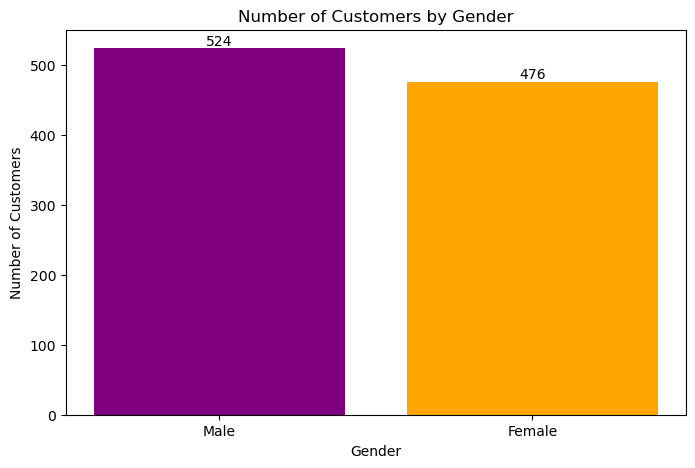

In [50]:
plt.figure(figsize=(8, 5))  # Graph's size
bars = plt.bar(type_counts.index, type_counts.values, color=['purple', 'orange']) 

plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Gender')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
    
plt.show()

In [51]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   customer_id      1000 non-null   object        
 1   gender           1000 non-null   object        
 2   region           1000 non-null   object        
 3   age              1000 non-null   float64       
 4   product_name     1000 non-null   object        
 5   category         1000 non-null   object        
 6   unit_price       1000 non-null   float64       
 7   quantity         1000 non-null   int64         
 8   total_price      1000 non-null   int64         
 9   shipping_fee     1000 non-null   float64       
 10  shipping_status  1000 non-null   object        
 11  order_date       1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 93.9+ KB


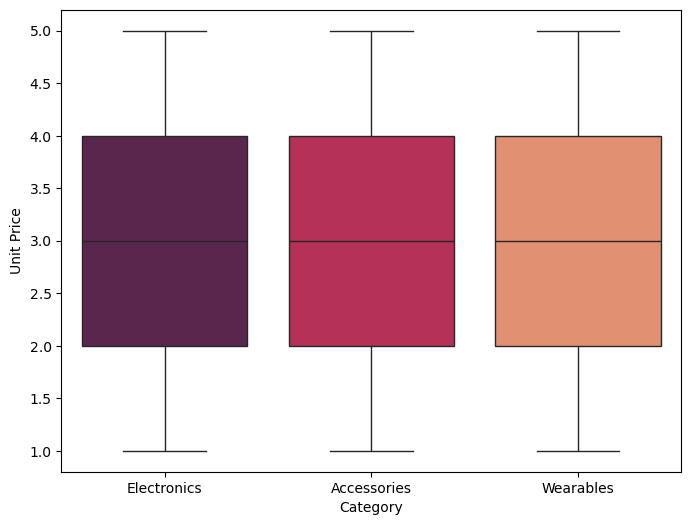

In [52]:
plt.figure(figsize=(8, 6))

sns.boxplot(x='category', y='quantity', data=df, palette=("rocket"))

plt.xlabel('Category')
plt.ylabel('Unit Price')

plt.show()

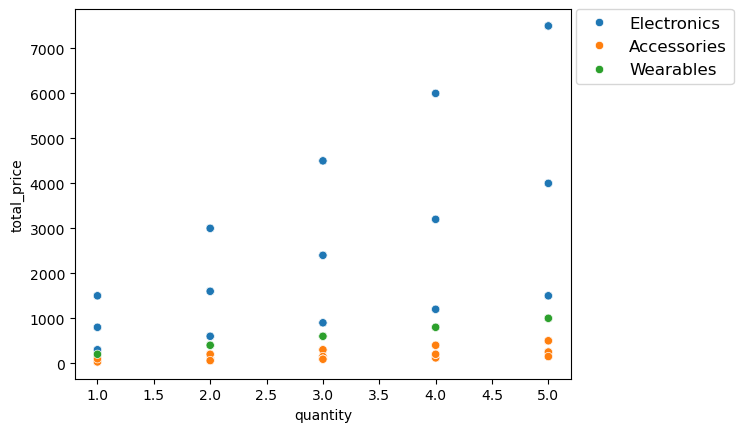

In [54]:
ax = sns.scatterplot(data=df, x='quantity', y='total_price' , hue='category', legend=True)


ax.legend( bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0., fontsize=12)
plt.show()

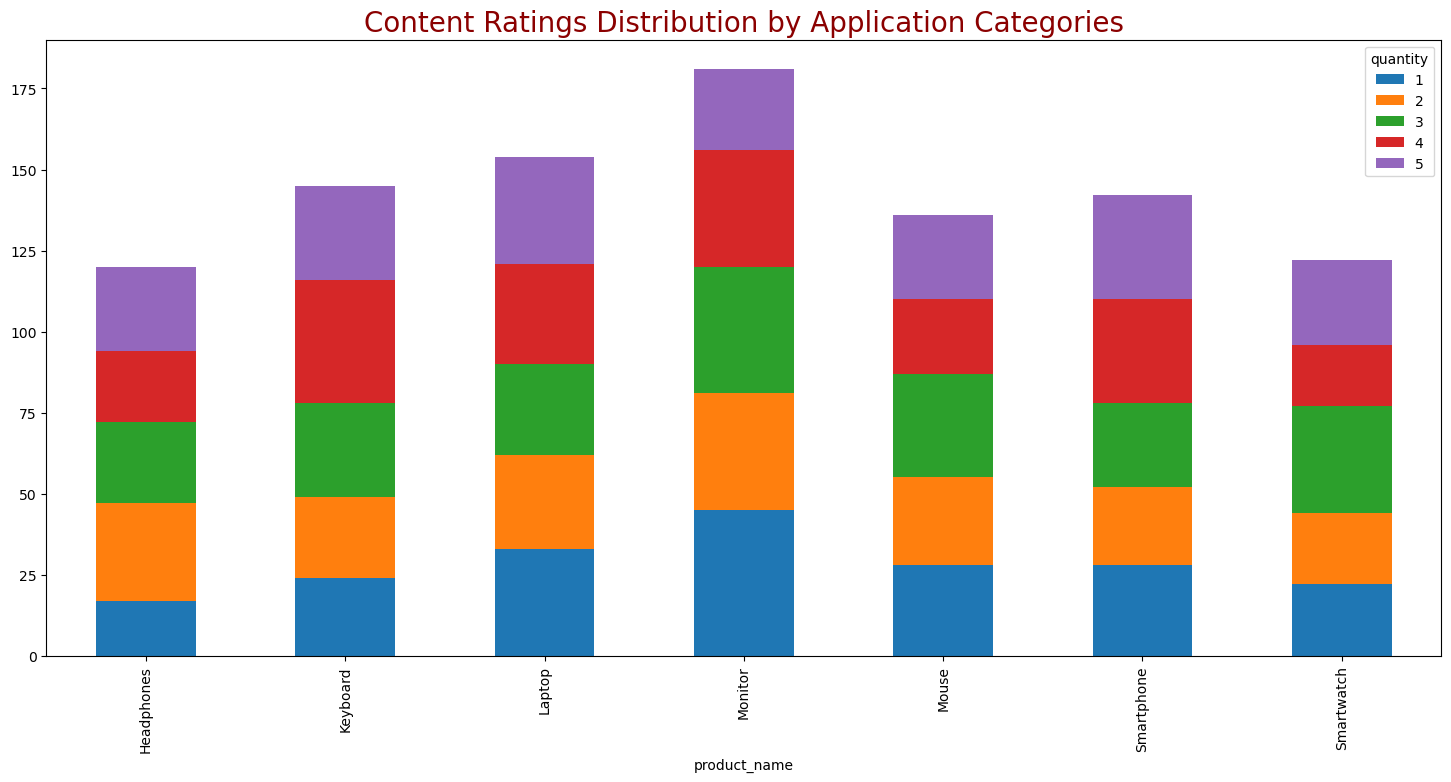

In [55]:
content_category_cross = pd.crosstab( df['product_name'], df['quantity'])

content_category_cross.plot(kind='bar', stacked=True, figsize=(18,8))

plt.title("Content Ratings Distribution by Application Categories", fontdict={'fontsize': 20, 'color': 'darkred'});

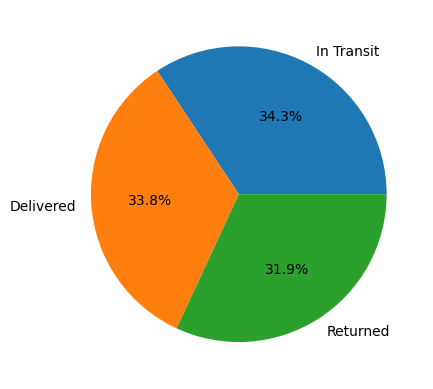

In [56]:
status = df2.shipping_status.value_counts()
plt.pie(x= status.values, labels = status.index, autopct='%1.1f%%');

In [61]:
df2['year'] = pd.DatetimeIndex(df2['order_date']).year

# Yıllara ve teslimat durumuna göre gruplama ve sayma
yearly_status = df2.groupby(['year', 'shipping_status']).size().unstack(fill_value=0)

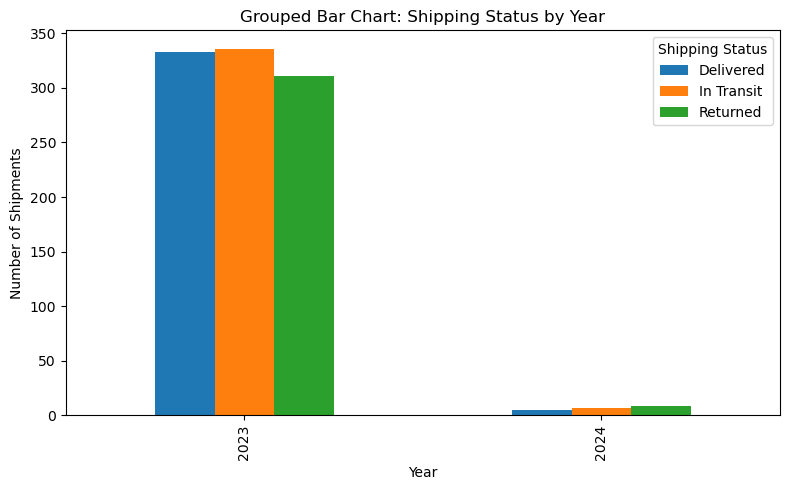

In [62]:
# 2. Grouped Bar Chart (Gruplu Çubuk Grafik)
yearly_status.plot(kind='bar', stacked=False, figsize=(8, 5))
plt.title('Grouped Bar Chart: Shipping Status by Year')
plt.xlabel('Year')
plt.ylabel('Number of Shipments')
plt.legend(title='Shipping Status')
plt.tight_layout()
plt.show()

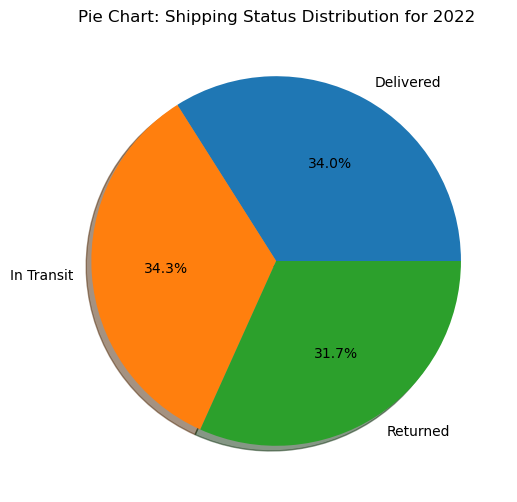

In [65]:
# 5. Pie Chart (Pasta Grafiği) - 2023 Yılına ait verileri pie chart ile gösterelim
yearly_status.loc[2023].plot(kind='pie', autopct='%1.1f%%', shadow=True, figsize=(6, 6))
plt.title('Pie Chart: Shipping Status Distribution for 2022')
plt.ylabel('')  # y-label'i gizleyelim çünkü pasta grafiğinde gerekli değil
plt.show()

<a id='save-data'></a>
# <font color='firebrick'> <b>Save to Dataset</b><font color='black'> 

In [66]:
df.to_csv('e-commerce_eda.csv', index=False)

<p style="background-color:firebrick;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>THANK YOU!</b></p>